In [36]:
# both algorithms
# k=100
# reconstruction error
# salt and pepper noise, p in (0.1, 0.25, 0.4), r=.5
from NMF_Implementation.L21Norm import Algorithm as L21Norm
from NMF_Implementation.L2Norm import Algorithm as L2Norm
from NMF_Implementation.base import load_data, Implementation
from NMF_Implementation.Noise import reconstruction_error_procedure, salt_and_pepper
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from typing import Dict
from collections import namedtuple

In [18]:
Xo, Yo = load_data('../data/ORL')
Xy, Yy = load_data('../data/CroppedYaleB')
model_classes : Dict[str, Implementation] = dict(
    l21=L21Norm,
    l2=L2Norm
)
datasets = dict(
    orl=Xo,
    yale=Xy,
)

40


In [42]:
Observation = namedtuple('Observation', ['proportion_noise', 'reconstruction_error', 'k', 'dataset', 'proportion_white', 'model_type'])
def run_one(params: Observation):
    p = params.proportion_noise
    r = params.proportion_white
    k = params.k
    modelname = params.model_type
    datasetname = params.dataset
    recon_err = params.reconstruction_error
    
    dataset = datasets[datasetname]
    model = model_classes[modelname](k, stop_threshold=-np.inf, max_iter=1000)
    
    def noisefunc(X):
        return salt_and_pepper(X, p, r)
    
    recon_error = reconstruction_error_procedure(dataset, 1, model, noisefunc)
    print(p, r, k, modelname, datasetname, recon_error)
    return p, r, k, modelname, datasetname, recon_error

In [27]:
to_run = []
for dataset in ['orl']:
    for p in [0.1, 0.25, 0.4]:
        for r in [.5]:
            for model in ['l21', 'l2']:
                for k in [100]:
                    to_run.append(Observation(p, None, k, dataset, r, model))

In [26]:
res = []
for r in to_run:
    res.append(run_one(r))

0.1 0.5 100 l21 orl 0.3045557037286761
0.1 0.5 100 l2 orl 0.3082964032092436
0.25 0.5 100 l21 orl 0.48766243366654494
0.25 0.5 100 l2 orl 0.49684494034722937
0.4 0.5 100 l21 orl 0.6036480523204741
0.4 0.5 100 l2 orl 0.6239013784144677


KeyboardInterrupt: 

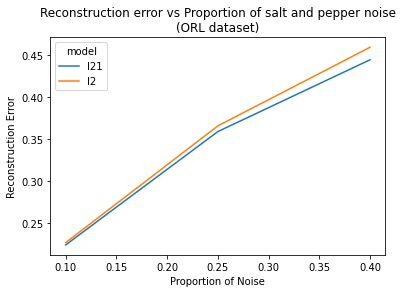

In [47]:
df = pd.DataFrame(res, columns=['proportion_noise', 'proportion_white', 'components', 'model', 'dataset', 'reconstruction_error'])
sns.lineplot(data=df, x='proportion_noise', y='reconstruction_error', hue='model')
plt.title('Reconstruction error vs Proportion of salt and pepper noise\n(ORL dataset)')
plt.xlabel('Proportion of Noise')
plt.ylabel('Reconstruction Error')
#plt.savefig('./figures/reconstruction_error_orl_pnoise.png')